<a href="https://colab.research.google.com/github/yogendra1109/Customer-lifetime-value-Insurance/blob/main/demand_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/My Drive/Hackathon/train4.csv'
test_path = '/content/drive/My Drive/Hackathon/test4.csv'
sample_path = '/content/drive/My Drive/Hackathon/sample4.csv'

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample = pd. read_csv(sample_path)

In [ ]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [ ]:
train.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [ ]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [ ]:
test.isnull().sum()

date    0
hour    0
dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error as mse
import os
import sys
import warnings
warnings.simplefilter("ignore")

plt.rcParams.update({'figure.figsize':(20,10)})
plt.style.use('fivethirtyeight')

In [ ]:
def rmse(x,y):
    return round(np.sqrt(mse(x,y)),4)

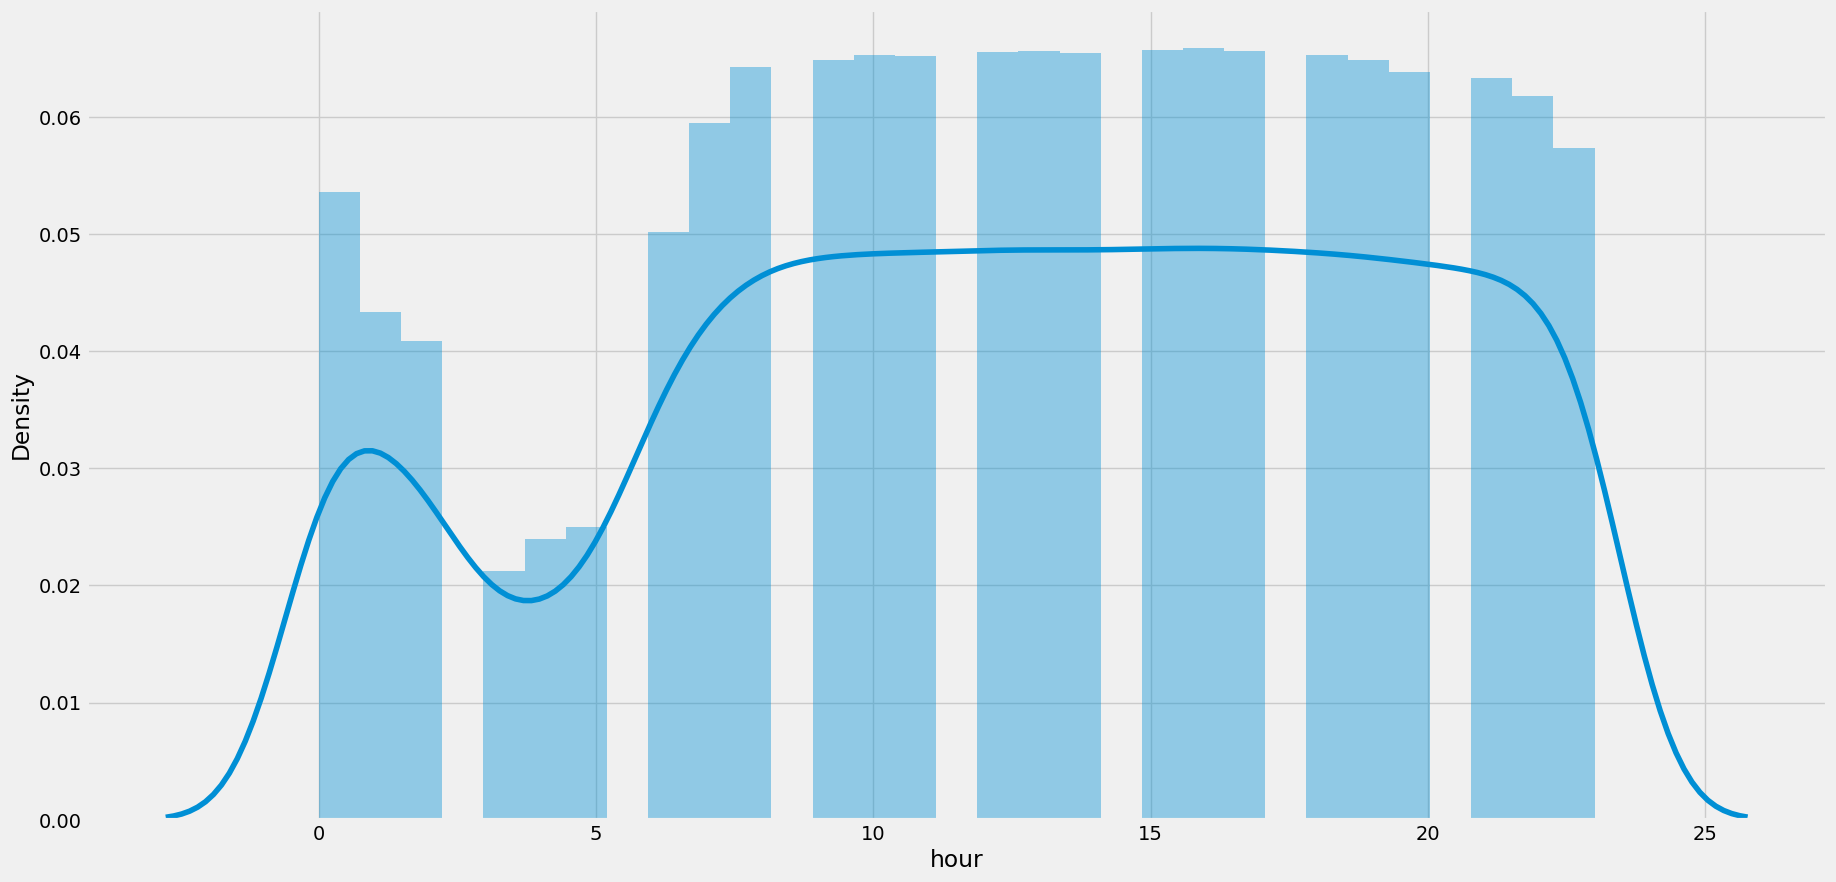

In [ ]:
sns.distplot(train['hour'])
plt.show()

<Axes: >

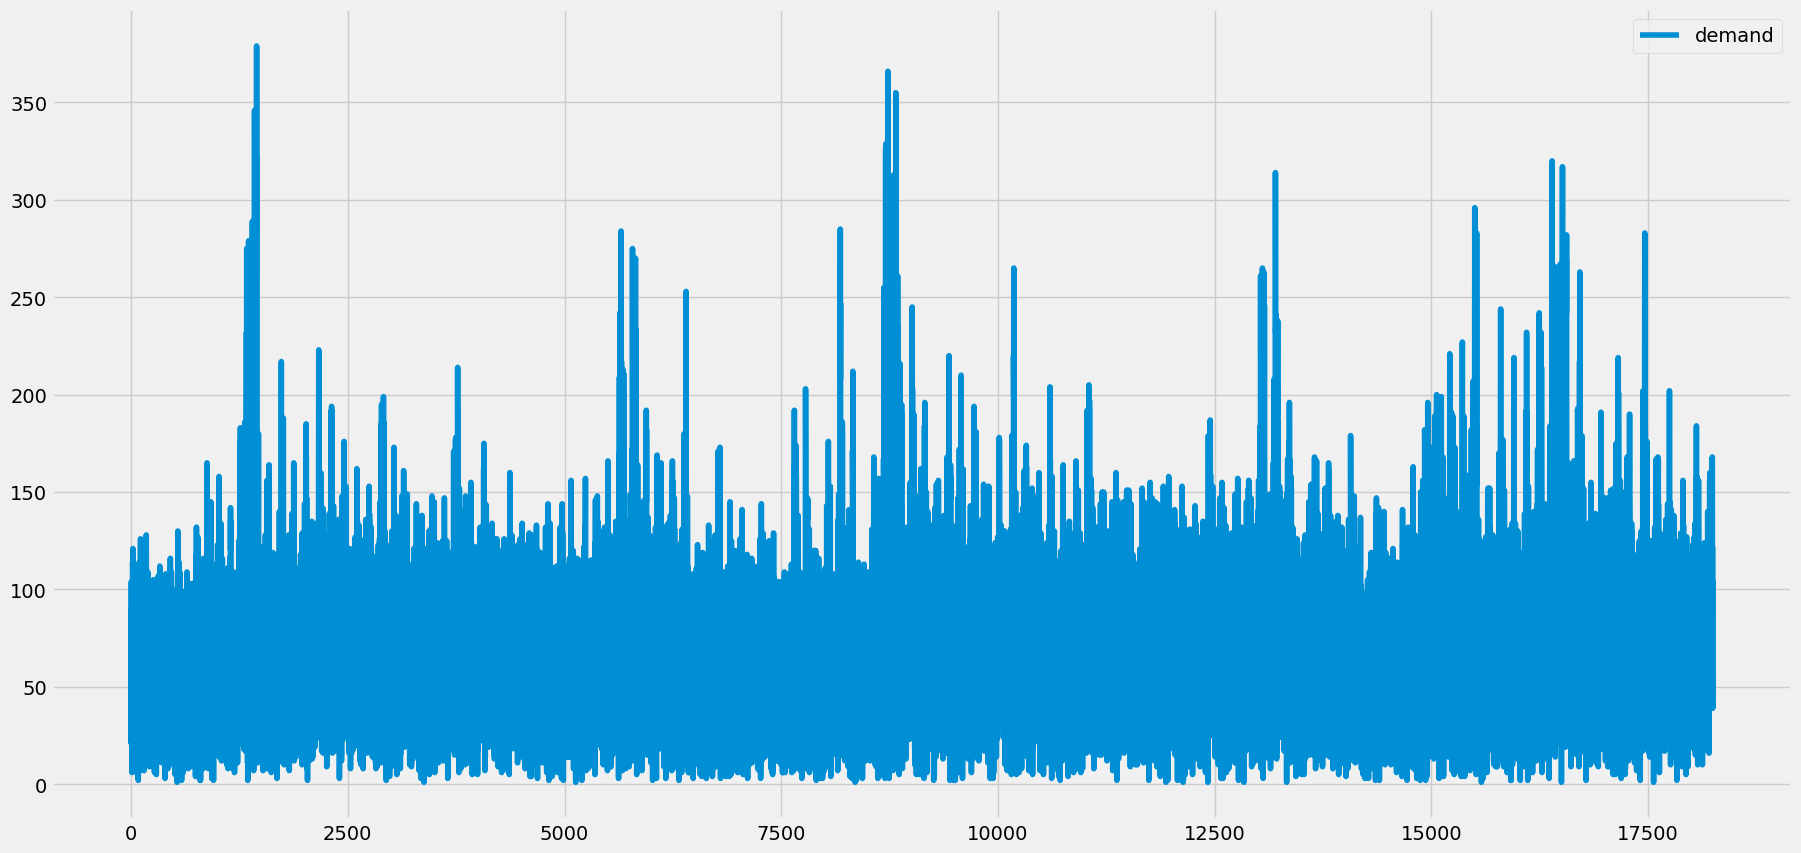

In [ ]:
train[['date','demand']].plot()

In [ ]:
train['date'] = pd.to_datetime(train['date'],yearfirst=True,infer_datetime_format=True)

In [ ]:
epoch= pd.Timestamp("2018-08-25")

In [ ]:
def feature_gen(df):
    df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek

    df['month'] = pd.to_datetime(df['date']).dt.month

    df['is_weekend'] = df.dayofweek.apply(lambda x: 0 if x<5 else 1)

    df['wom'] =  pd.to_datetime(df['date']).apply(lambda d: (d.day-1) // 7 + 1)

    df['is_month_start'] = pd.to_datetime(df['date']).dt.is_month_start.apply(lambda x : int(x))

    df['is_month_end'] = pd.to_datetime(df['date']).dt.is_month_end.apply(lambda x : int(x))

    df["week_number"]=np.where(df.date.astype("datetime64").le(epoch), \
                               df.date.astype("datetime64").dt.week, \
                               df.date.astype("datetime64").sub(epoch).dt.days//7+52)

    df['is_year_start'] = pd.to_datetime(df['date']).dt.is_year_start.apply(lambda x : int(x))

    df['is_year_end'] = pd.to_datetime(df['date']).dt.is_year_end.apply(lambda x : int(x))

    return df

In [ ]:
train.columns

Index(['date', 'hour', 'demand', 'dayofweek', 'month', 'is_weekend', 'wom',
       'is_month_start', 'is_month_end', 'week_number'],
      dtype='object')

In [ ]:
train = feature_gen(train)

In [ ]:
test = feature_gen(test)

In [ ]:
train.head()

,date,hour,demand,dayofweek,month,is_weekend,wom,is_month_start,is_month_end,week_number,is_year_start,is_year_end
0,2018-08-18,9,91,5,8,1,3,0,0,33,0,0
1,2018-08-18,10,21,5,8,1,3,0,0,33,0,0
2,2018-08-18,13,23,5,8,1,3,0,0,33,0,0
3,2018-08-18,14,104,5,8,1,3,0,0,33,0,0
4,2018-08-18,15,81,5,8,1,3,0,0,33,0,0


In [ ]:
test.head()

,date,hour,dayofweek,month,is_weekend,wom,is_month_start,is_month_end,week_number,is_year_start,is_year_end
0,2021-03-01,0,0,3,0,1,1,0,183,0,0
1,2021-03-01,1,0,3,0,1,1,0,183,0,0
2,2021-03-01,2,0,3,0,1,1,0,183,0,0
3,2021-03-01,3,0,3,0,1,1,0,183,0,0
4,2021-03-01,5,0,3,0,1,1,0,183,0,0


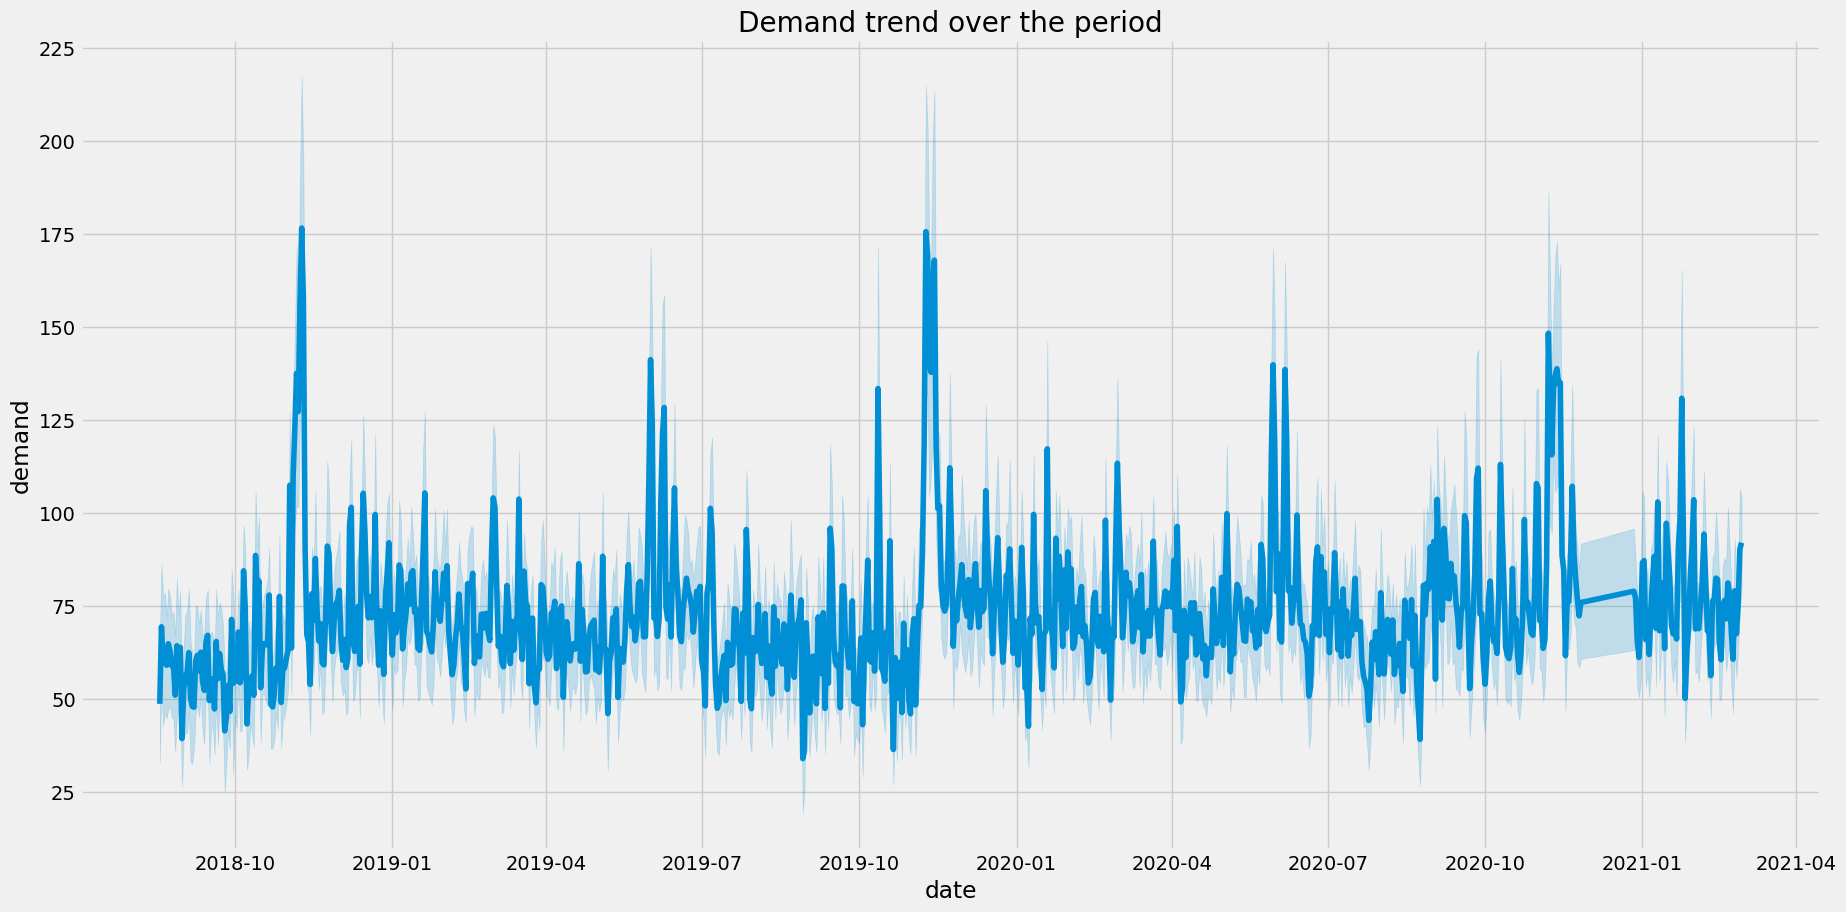

In [ ]:
sns.lineplot(x='date',y='demand',data=train)
plt.title("Demand trend over the period");

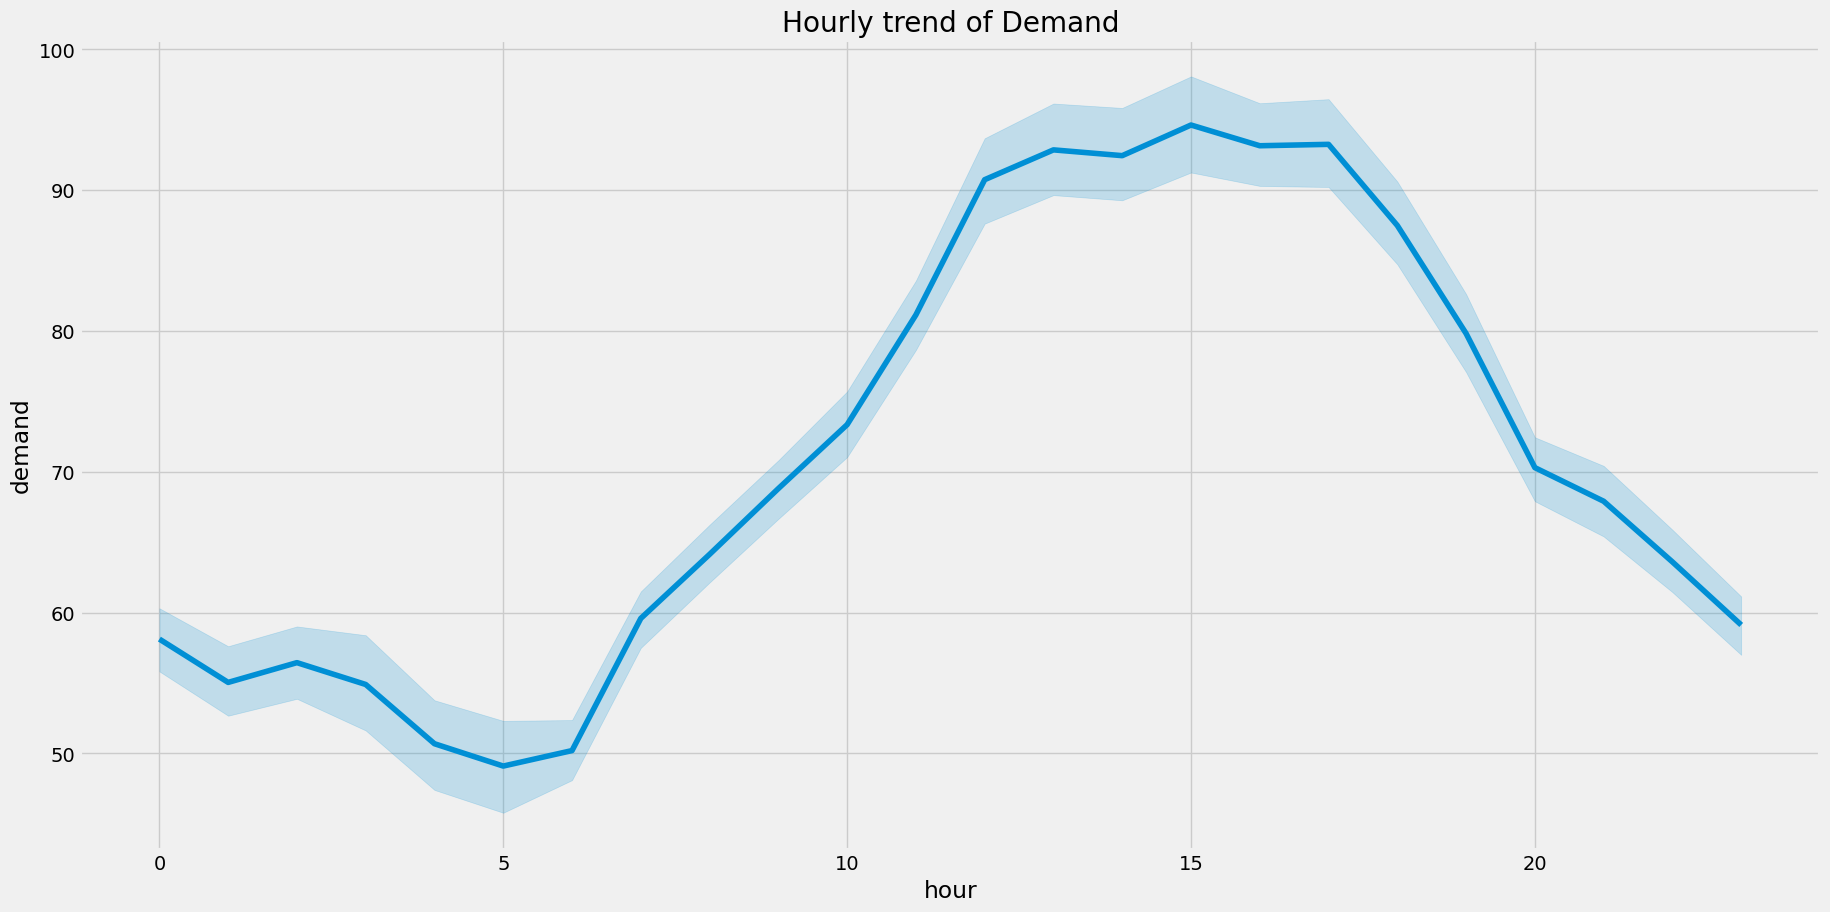

In [ ]:
sns.lineplot(x='hour',y='demand',data=train);
plt.title("Hourly trend of Demand");

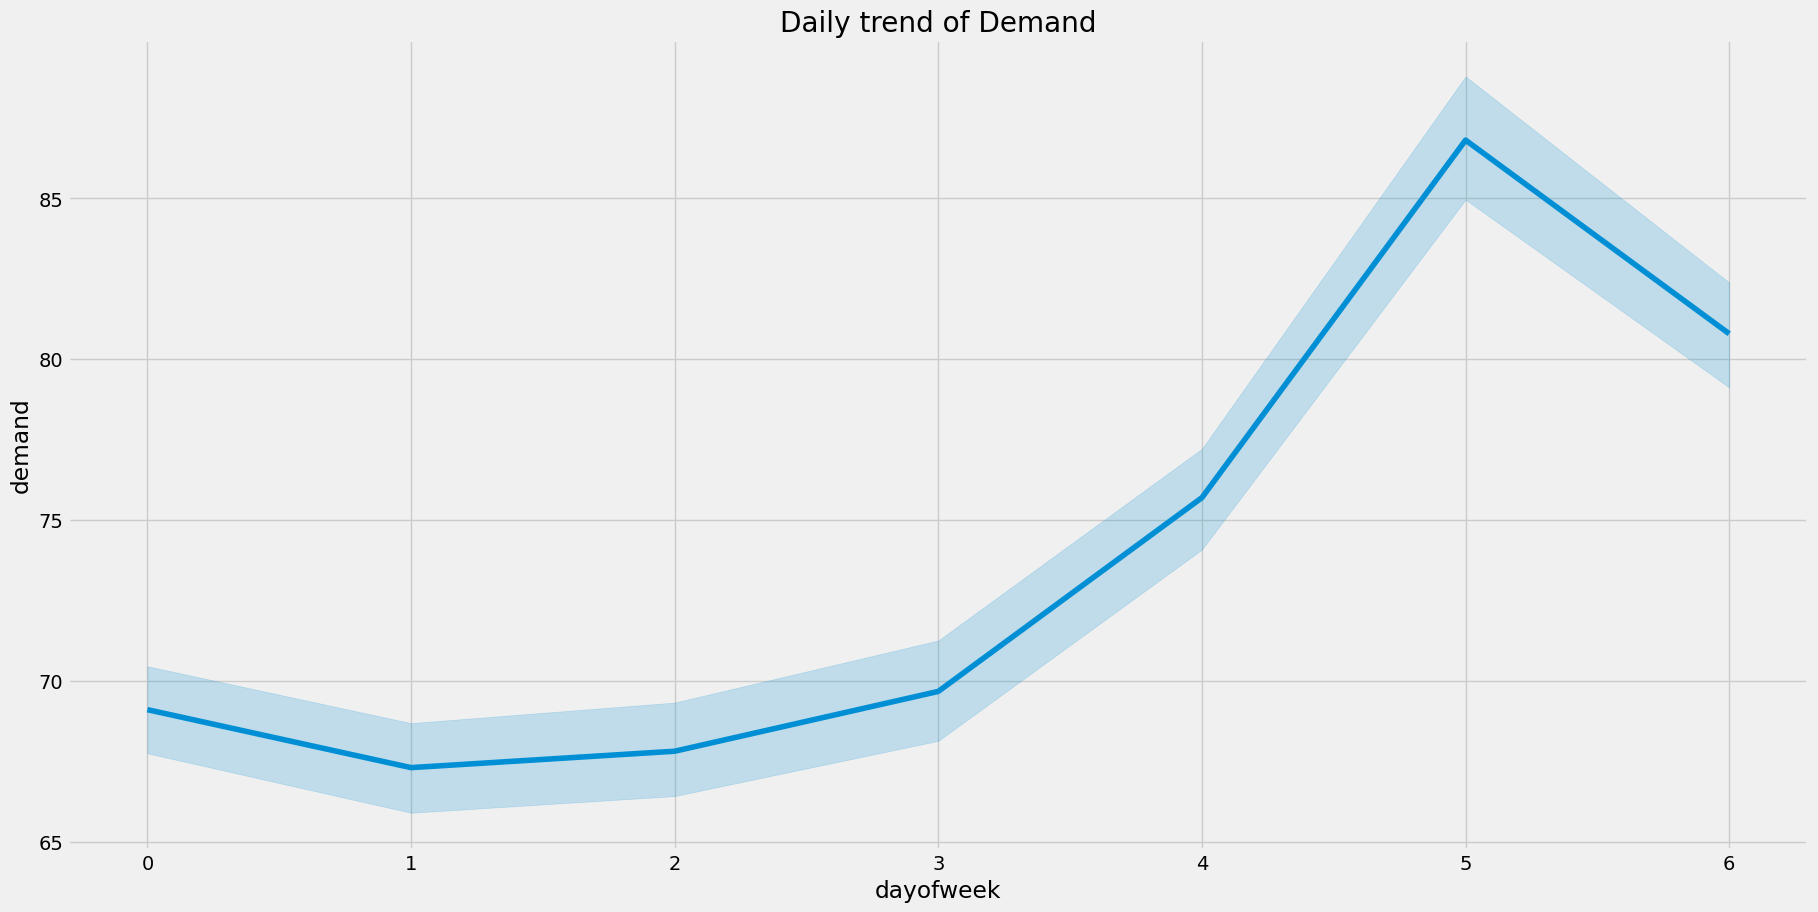

In [ ]:
sns.lineplot(x='dayofweek',y='demand',data=train);
plt.title("Daily trend of Demand");

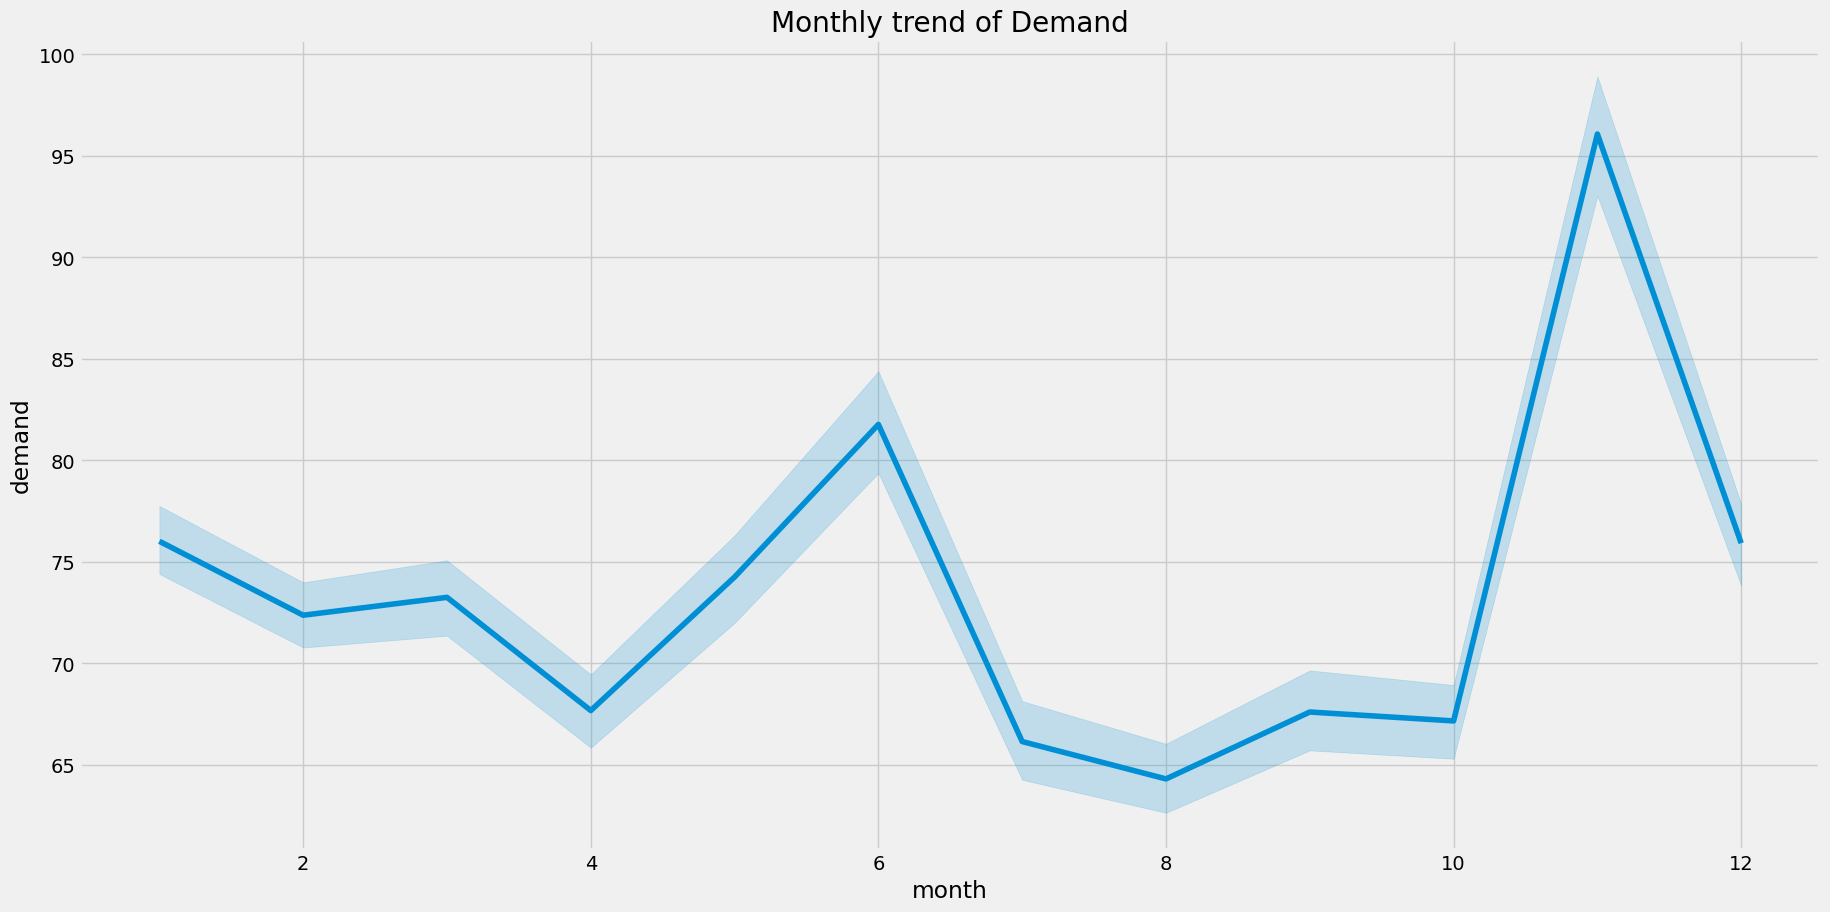

In [ ]:
sns.lineplot(x='month',y='demand',data=train);
plt.title("Monthly trend of Demand");

In [ ]:
x_train = train.loc[train.date.dt.year<2021]
y_train = x_train.pop('demand')

In [ ]:
x_valid = train.loc[train.date.dt.year==2021]
y_valid = x_valid.pop('demand')

In [ ]:
x_train.shape,x_valid.shape

((16942, 11), (1305, 11))

In [ ]:
train.columns

Index(['date', 'hour', 'demand', 'dayofweek', 'month', 'is_weekend', 'wom',
       'is_month_start', 'is_month_end', 'week_number', 'is_year_start',
       'is_year_end'],
      dtype='object')

In [ ]:
features = ['hour', 'dayofweek', 'month', 'is_weekend', 'wom',
       'is_month_start', 'is_month_end', 'is_year_start',
       'is_year_end']

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMRegressor(n_estimators=3500,
                  num_leaves=125,
                  max_depth=10,
                  min_child_samples=3,
                  learning_rate=0.01,
                  colsample_bytree=0.5,
                  reg_alpha=0.5,
                  reg_lambda=2,
                  early_stopping_rounds=100,
                  verbosity=100)


In [ ]:
model.fit(
    x_train[features], y_train,
    eval_set=[(x_train[features], y_train), (x_valid[features], y_valid)],
    eval_metric='rmse'
)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.927824
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.535690
[LightGBM] [Debug] init for col-wise cost 0.001528 seconds, init for row-wise cost 0.001504 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 16942, number of used features: 9
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Start training from score 73

LGBMRegressor(colsample_bytree=0.5, early_stopping_rounds=100,
              learning_rate=0.01, max_depth=10, min_child_samples=3,
              n_estimators=3500, num_leaves=125, reg_alpha=0.5, reg_lambda=2,
              verbosity=100)

In [ ]:
forecasting = model.predict(test[features])

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

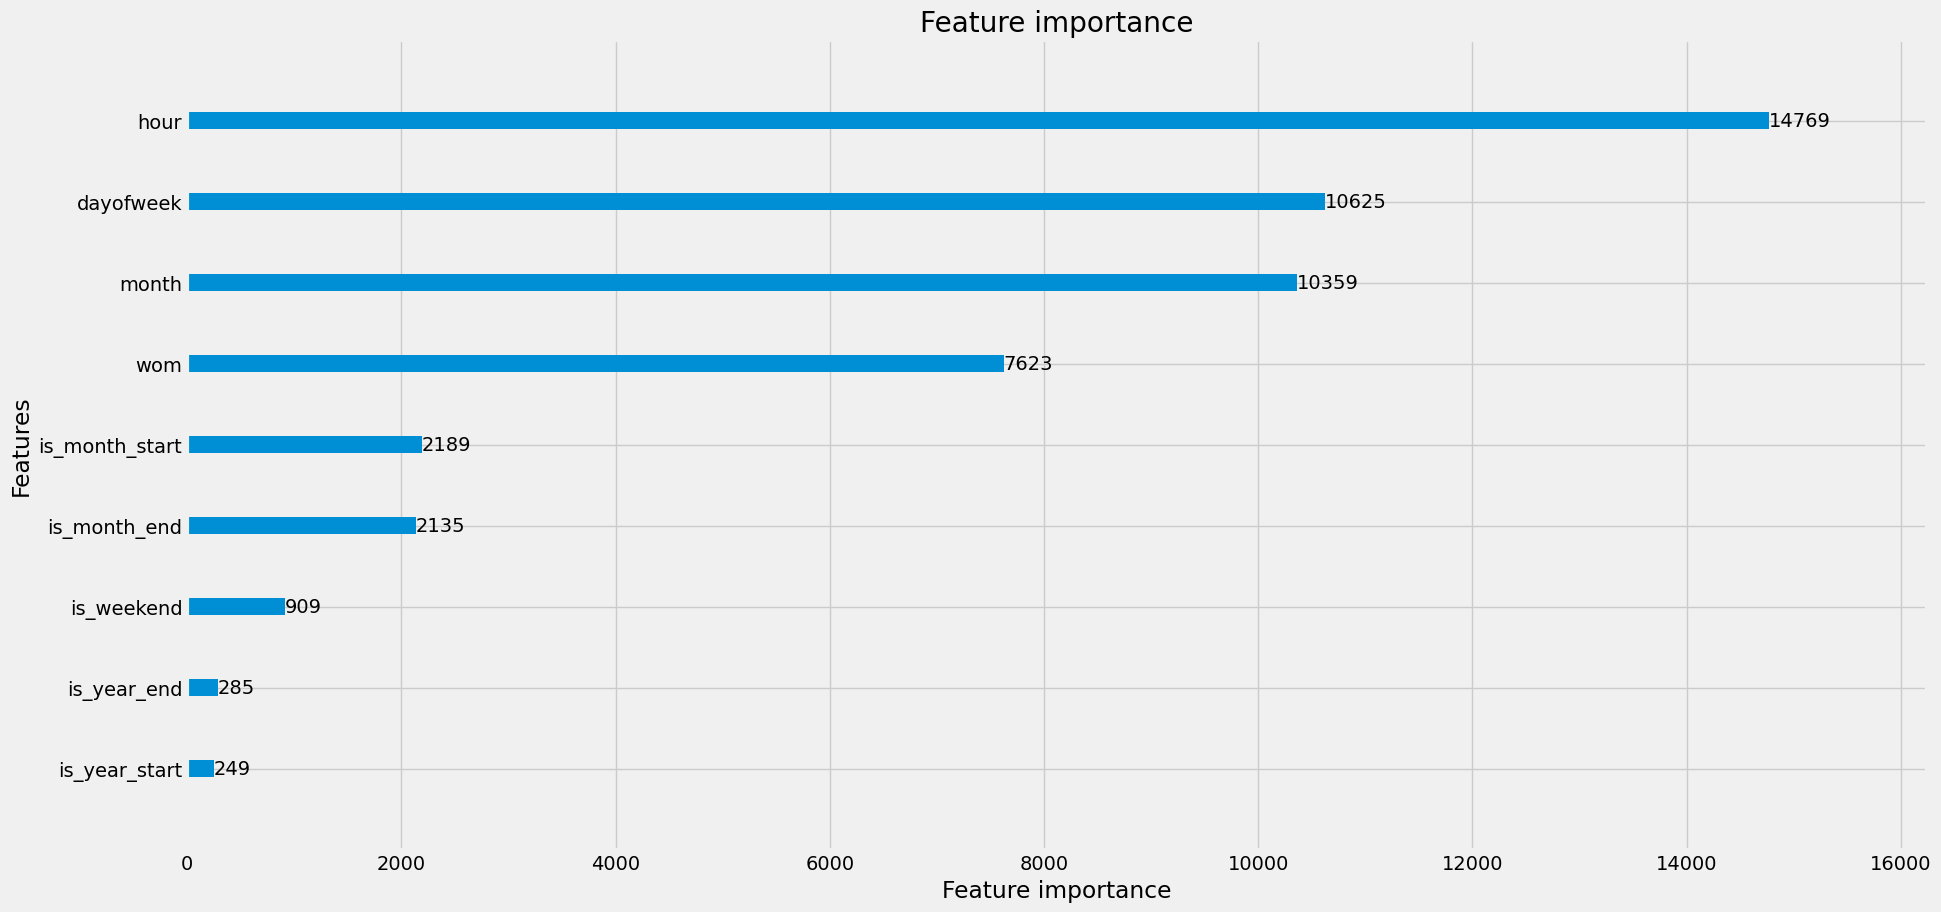

In [ ]:
lgb.plot_importance(model, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='Feature importance', ylabel='Features')

In [ ]:
sample['demand'] = forecasting

<Axes: xlabel='date'>

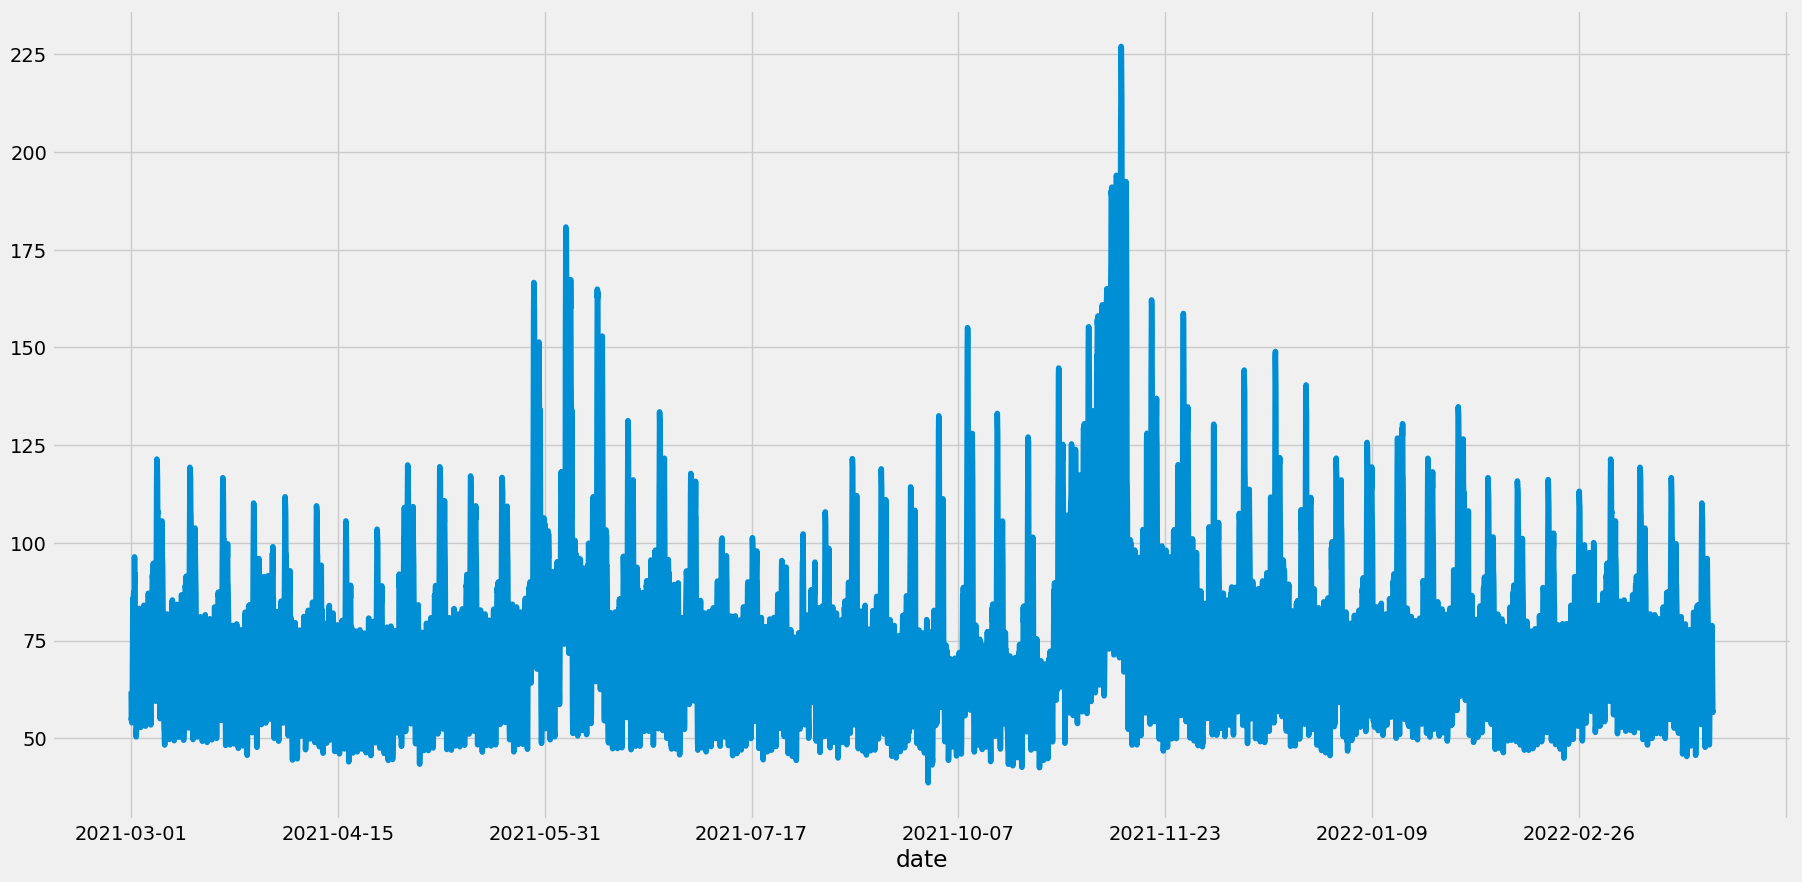

In [ ]:
sample.set_index('date')['demand'].plot()

In [ ]:
sample.to_csv('predicated_data.csv',index=False)